# Thông tin sinh viên

Họ và tên: Nguyễn Nguyên Khôi

MSSV: 21521009

Lớp: CS116.N21.KHCL

Bài tập 4

Ngày: 7-4-2023

# Bước 1: Load dữ liệu từ file CSV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
dataset = pd.read_csv("gdrive/My Drive/Salary_Data.csv")
dataset.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)

(30, 1)
(30,)


In [5]:
y = y.reshape(len(y), 1)

# Bước 2: Chia tập dữ liệu thành 2 phần train và test theo tỉ lệ 8:2

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Bước 3: Tạo mô hình Linear Regression với sklearn và huấn luyện trên dữ liệu train

In [7]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

# Bước 4: Sử dụng mô hình đã huấn luyện để dự đoán trên tập test

In [8]:
y_test_pred = lr_model.predict(X_test)

In [9]:
# r2_score
print("R2_score on test set:", r2_score(y_test_pred, y_test))

R2_score on test set: 0.986482673117654


In [10]:
# mean squared error
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean squared error on test set:", test_mse)

Mean squared error on test set: 12823412.298126549


# Bước 5: Đánh giá hiệu quả của mô hình trên cả 2 tập train và test

In [11]:
y_train_pred = lr_model.predict(X_train)

In [12]:
# r2_score
print("R2_score on train set:", r2_score(y_train_pred, y_train))

R2_score on train set: 0.9375208747236417


In [13]:
# mean squared error
train_mse = mean_squared_error(y_train, y_train_pred)
print("Mean squared error on train set:", train_mse)

Mean squared error on train set: 36149670.11816131


# Bước 6: Trực quan hóa kết quả dự đoán bằng biểu đồ 2D với 2 biến phụ thuộc và độc lập

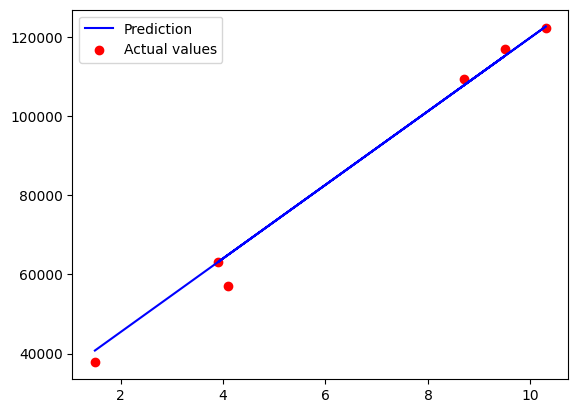

In [14]:
plt.plot(X_test, y_test_pred, color= "blue", label="Prediction")        # the prediction of test set made by the model
plt.scatter(X_test, y_test, color= "red", label="Actual values")        # the actual values of test set
plt.legend()
plt.show()